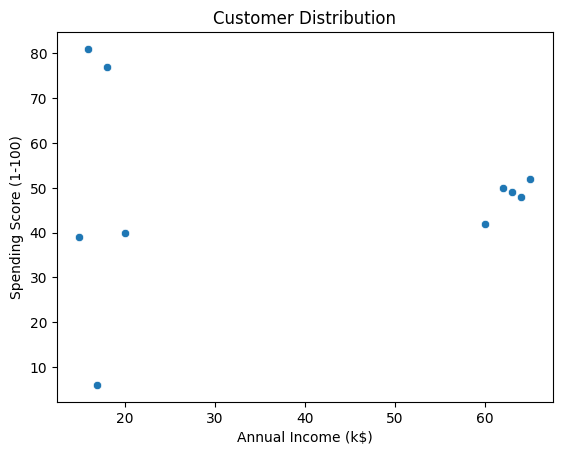

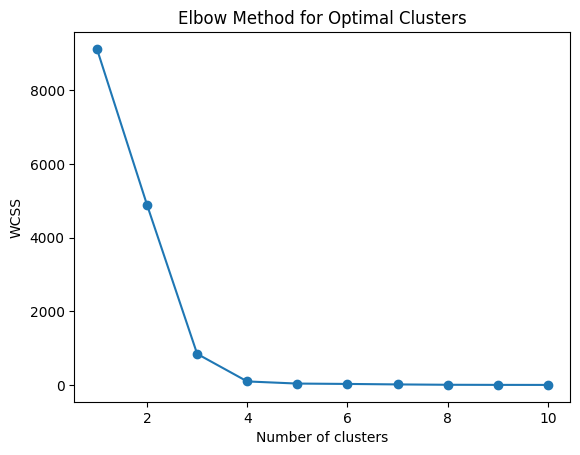

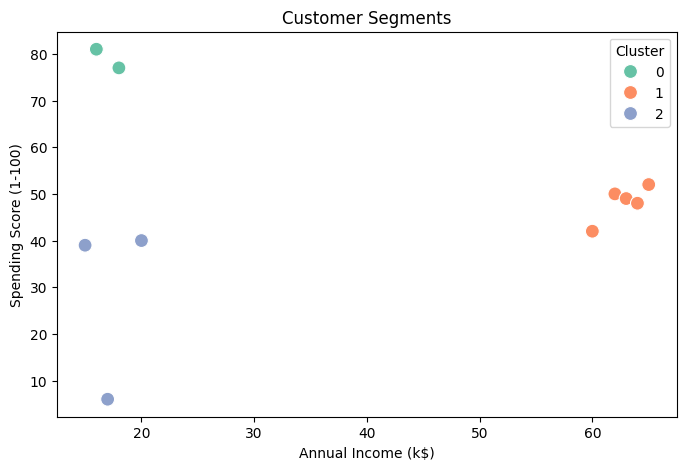

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load or simulate customer data
# Sample dataset: Annual Income vs Spending Score
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual Income (k$)': [15, 16, 17, 18, 20, 60, 62, 63, 64, 65],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 42, 50, 49, 48, 52]
}

df = pd.DataFrame(data)

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualize data before clustering
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution')
plt.show()

# Use the Elbow Method to find optimal number of clusters (optional)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clustered groups
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='Set2', data=df, s=100
)
plt.title('Customer Segments')
plt.show()
